In [1]:
import cv2
import numpy as np
import types
from google.colab.patches import cv2_imshow
# from matplotlib import pyplot as plt
# %matplotlib inline

In [2]:
def messageToBinary(message):
  if type(message) == str:
    return ''.join([ format(ord(i), "08b") for i in message ])
  elif type(message) == bytes or type(message) == np.ndarray:
    return [ format(i, "08b") for i in message ]
  elif type(message) == int or type(message) == np.uint8:
    return format(message, "08b")
  else:
    raise TypeError("Input type not supported")

In [3]:
# Function to hide the secret message into the image

def hideData(image, secret_message):

  # calculate the maximum bytes to encode
  n_bytes = image.shape[0] * image.shape[1] * 3 // 8
  print("Maximum bytes to encode:", n_bytes)

  #Check if the number of bytes to encode is less than the maximum bytes in the image
  if len(secret_message) > n_bytes:
      raise ValueError("Error encountered insufficient bytes, need bigger image or less data !!")
  
  secret_message += "#####" # you can use any string as the delimeter

  data_index = 0
  # convert input data to binary format using messageToBinary() fucntion
  binary_secret_msg = messageToBinary(secret_message)

  data_len = len(binary_secret_msg) #Find the length of data that needs to be hidden
  for values in image:
      for pixel in values:
          # convert RGB values to binary format
          r, g, b = messageToBinary(pixel)
          # modify the least significant bit only if there is still data to store
          if data_index < data_len:
              # hide the data into least significant bit of red pixel
              pixel[0] = int(r[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              # hide the data into least significant bit of green pixel
              pixel[1] = int(g[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              # hide the data into least significant bit of  blue pixel
              pixel[2] = int(b[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          # if data is encoded, just break out of the loop
          if data_index >= data_len:
              break

  return image

In [4]:
def showData(image):

  binary_data = ""
  for values in image:
      for pixel in values:
          r, g, b = messageToBinary(pixel) #convert the red,green and blue values into binary format
          binary_data += r[-1] #extracting data from the least significant bit of red pixel
          binary_data += g[-1] #extracting data from the least significant bit of red pixel
          binary_data += b[-1] #extracting data from the least significant bit of red pixel
  # split by 8-bits
  all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
  # convert from bits to characters
  decoded_data = ""
  for byte in all_bytes:
      decoded_data += chr(int(byte, 2))
      if decoded_data[-5:] == "#####": #check if we have reached the delimeter which is "#####"
          break
  #print(decoded_data)
  return decoded_data[:-5] #remove the delimeter to show the original hidden message

In [10]:
# Encode data into image 
def encode_text(): 
  image_name = input("Enter image name(with extension): ") 
  image = cv2.imread(image_name) # Read the input image using OpenCV-Python.
  #It is a library of Python bindings designed to solve computer vision problems. 
  
  #details of the image
  print("The shape of the image is: ",image.shape) #check the shape of image to calculate the number of bytes in it
  
  resized_image = cv2.resize(image, (500, 500)) #resize the image as per your requirement
 
  
  
      
  data = input("Enter data to be encoded : ")
  if (len(data) == 0): 
    raise ValueError('Data is empty')

  print("The original image is as shown below: ")
  cv2_imshow(resized_image) #display the image
  
  filename = "img2.png"
  encoded_image = hideData(image, data) # call the hideData function to hide the secret message into the selected image
  cv2.imwrite(filename, encoded_image)

In [6]:
# Decode the data in the image 
def decode_text():
  # read the image that contains the hidden image
  image_name = input("Enter the name of the steganographed image that you want to decode (with extension) :") 
  image = cv2.imread(image_name) #read the image using cv2.imread() 

  print("The Steganographed image is as shown below: ")
  resized_image = cv2.resize(image, (500, 500))  #resize the original image as per your requirement
  cv2_imshow(resized_image) #display the Steganographed image
    
  text = showData(image)
  return text

In [7]:

# Image Steganography         
def Steganography(): 
    a = input("Image Steganography \n 1. Encode the data \n 2. Decode the data \n Your input is: ")
    userinput = int(a)
    if (userinput == 1):
      print("\nEncoding....")
      encode_text() 
          
    elif (userinput == 2):
      print("\nDecoding....") 
      print("Decoded message is " + decode_text()) 
    else: 
        raise Exception("Enter correct input") 

Image Steganography 
 1. Encode the data 
 2. Decode the data 
 Your input is: 1

Encoding....
Enter image name(with extension): gal.png
The shape of the image is:  (359, 500, 3)
Enter data to be encoded : helloworld
The original image is as shown below: 


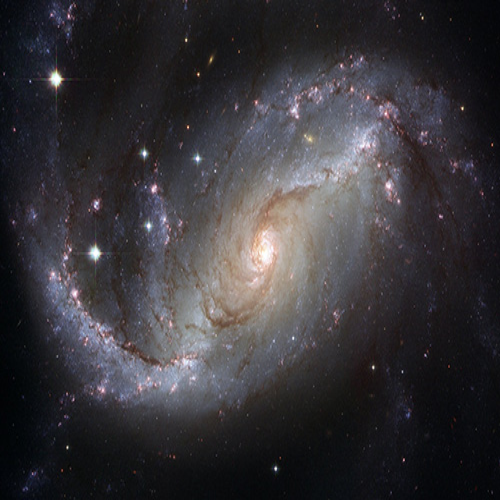

Maximum bytes to encode: 67312


In [11]:
Steganography()

Image Steganography 
 1. Encode the data 
 2. Decode the data 
 Your input is: 2

Decoding....
Enter the name of the steganographed image that you want to decode (with extension) :img2.png
The Steganographed image is as shown below: 


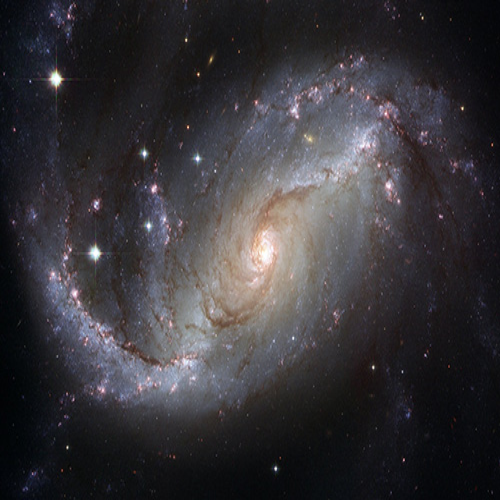

Decoded message is helloworld


In [14]:
Steganography()